In [1]:
import pandas as pd 
import numpy as np 

file = r"C:\Users\kokki\Downloads\archive (1)\creditcard.csv"

df=pd.read_csv(file)

In [2]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1081)

In [5]:
df.shape

(284807, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

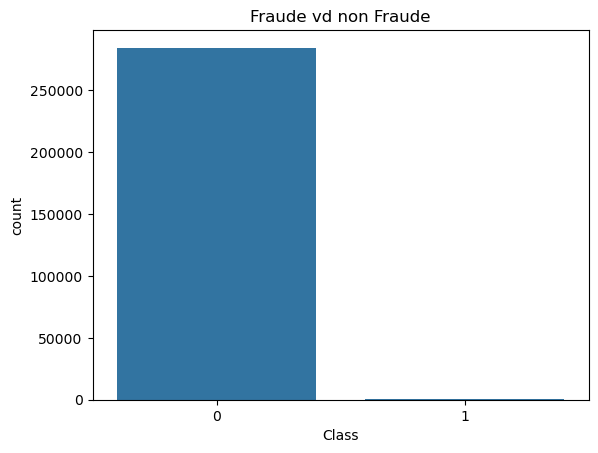

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Class',data=df)
plt.title("Fraud vd non Fraud")
plt.show()

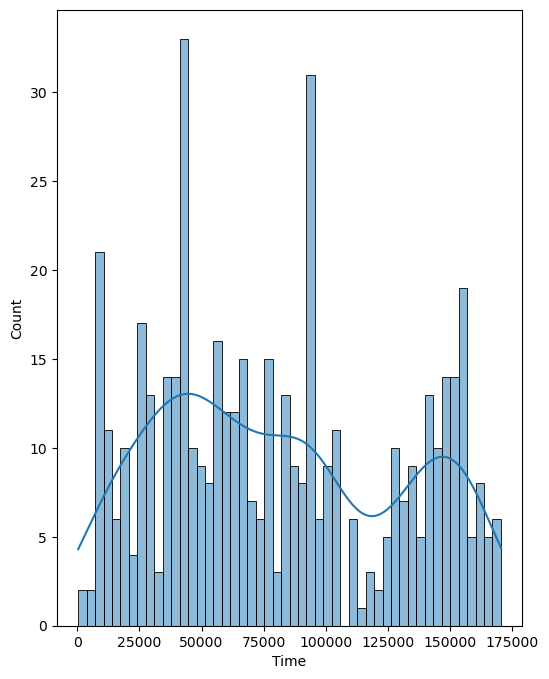

In [9]:
plt.figure(figsize=(6,8))
sns.histplot(df[df['Class']==1]['Time'],bins=50,kde=True)
plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler()

df['Amount_Scale']= scaler.fit_transform(df[['Amount']])
df['Time_Scale'] = scaler.fit_transform(df[['Time']]) 

df.drop(['Time','Amount'],axis=1,inplace=True)
                                        
                                        
                                         

In [11]:
X = df.drop(['Class'],axis=1)
Y = df['Class']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=42,
    stratify= Y
)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)
print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_train_sm.value_counts())

C:\Users\kokki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kokki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\kokki\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kokki\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, Y_train_sm)

Y_pred_lr = lr.predict(X_test)

Y_prob_lr = lr.predict_proba(X_test)[:,1]
threshold = 0.7
Y_pred_custom = (Y_prob_lr >= threshold).astype(int)


In [15]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
print(classification_report(Y_test,  Y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.90      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
Y_prob_rf = rf.predict_proba(X_test)[:,1]


In [17]:
print(classification_report(Y_test, Y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
confusion_matrix(Y_test, Y_pred_rf)
roc_auc_score(Y_test, Y_prob_rf)



np.float64(0.9580765743973446)

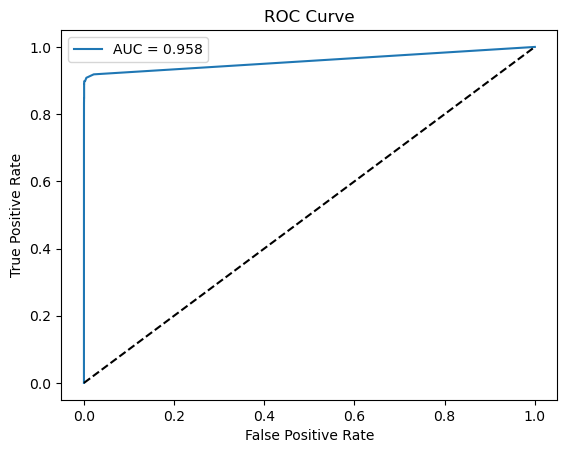

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_rf)
auc = roc_auc_score(Y_test, Y_prob_rf)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]),
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)
Y_prob_xgb = xgb.predict_proba(X_test)[:,1]

threshold = 0.7
Y_pred_custom = (Y_prob_xgb >= threshold).astype(int)

In [23]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(Y_test, Y_pred_xgb))
print("AUC:", roc_auc_score(Y_test, Y_prob_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.9809864998334732


In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight = len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]),
    random_state=42
)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 300, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best AUC:", grid.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.7}
Best AUC: 0.9846697911735642


In [26]:
xgb_final = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=200,
    subsample=0.7,
    scale_pos_weight = len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]),
    eval_metric='logloss',
    random_state=42
)

xgb_final.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
print(classification_report(Y_test, xgb_final.predict(X_test)))
print("AUC:", roc_auc_score(Y_test, xgb_final.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.88      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.62     56962
weighted avg       1.00      0.99      0.99     56962

AUC: 0.9787059959746419
